In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
!sed -i 's/archive.ubuntu.com/ftp.daumkakao.com/g' /etc/apt/sources.list
!apt-get update 
!fc-cache -fv
!apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib/*
plt.rc('font', family='NanumBarunGothic') 

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/X11R6/lib/X11/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfi

In [3]:
df = pd.read_csv('/The_MoDeep/data/전국횡단보도표준데이터.csv', encoding='cp949')
df

,시도명,시군구명,도로명,소재지도로명주소,소재지지번주소,횡단보도관리번호,횡단보도종류,자전거횡단도겸용여부,고원식적용여부,위도,...,적색신호시간,교통섬유무,보도턱낮춤여부,점자블록유무,집중조명시설유무,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,경상남도,양산시,양산대로,NaN,경상남도 양산시 하북면 용연리 1089-8,양산신-1001,1,N,N,35.431776,...,NaN,Y,Y,N,Y,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
1,경상남도,양산시,양산대로,NaN,경상남도 양산시 하북면 용연리 1012-4,양산신-1002,1,N,N,35.433768,...,NaN,N,Y,N,Y,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
2,경상남도,양산시,양산대로,NaN,경상남도 양산시 하북면 용연리 1145-3,양산신-1005,1,N,N,35.442733,...,NaN,N,Y,N,Y,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
3,경상남도,양산시,양산대로,NaN,경상남도 양산시 하북면 백록리 1040-1,양산신-1007,1,N,N,35.455274,...,NaN,N,Y,N,Y,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
4,경상남도,양산시,양산대로,NaN,경상남도 양산시 하북면 백록리 1009-3,양산신-1008,1,N,N,35.460196,...,NaN,N,Y,N,Y,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,경상남도,양산시,시도,NaN,경상남도 양산시 물금읍 범어리 2751,양산신-9013,1,N,N,35.324749,...,NaN,N,Y,Y,N,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
10321,경상남도,양산시,시도,NaN,경상남도 양산시 물금읍 범어리 2751,양산신-9013,1,N,N,35.324749,...,NaN,N,Y,Y,N,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
10322,경상남도,양산시,시도,NaN,경상남도 양산시 물금읍 범어리 2751,양산신-9014,1,N,N,35.324893,...,NaN,N,Y,N,N,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시
10323,경상남도,양산시,시도,NaN,경상남도 양산시 물금읍 범어리 2749,양산신-9015,1,Y,N,35.326391,...,NaN,N,Y,Y,N,양산시 교통과,055-392-2883,2021-05-10,5380000,경상남도 양산시


# 분석 절차

## 분석 주제
1. 데이터 전처리
    - null 값 처리
    - Y/N를 boolean으로 변환
 
2. 데이터 시각화
    - 그래프 시각화
   
3. 결론 도출

In [4]:
crosswalk = df.drop(["시도명", "시군구명", "도로명", "소재지도로명주소", "횡단보도관리번호", "횡단보도종류", "위도", "경도", "자전거횡단도겸용여부",
        "고원식적용여부", "교통섬유무", "적색신호시간", "제공기관명", "데이터기준일자", "관리기관전화번호", "소재지지번주소", "차로수",
        "횡단보도폭", "보행자신호등유무"], axis=1)
crosswalk.describe()

,횡단보도연장,녹색신호시간,제공기관코드
count,10325.000000,1604.000000,1.032500e+04
mean,13.382370,23.221945,4.601964e+06
std,8.090786,9.855126,7.477878e+05
min,0.000000,0.000000,3.530000e+06
25%,7.200000,20.000000,4.000000e+06
50%,12.000000,24.000000,4.610000e+06
75%,17.000000,28.000000,5.020000e+06
max,64.100000,115.000000,6.510000e+06


In [5]:
def samples_with_weight(series):
    total = len(series)
    missing = sum(series==' ')
    not_missing = total-missing
    
    samples = random.choices([0, 1], [missing/total, not_missing/total], k=missing)
    return samples

# 횡단 보도 점자 블록 비율

In [16]:
braille = crosswalk['점자블록유무'].copy()
samples = samples_with_weight(braille)
if samples != [] :
    braille[braille==' '] = samples
sum(braille==' ') # 결측치 수

0

In [17]:
#Y=1 N=0
braille.replace('Y', 1, inplace=True)
braille.replace('y', 1, inplace=True)

braille.replace('N', 0, inplace=True)
braille.replace('n', 0, inplace=True)

([<matplotlib.patches.Wedge at 0x7fa246fa2d50>,
 [Text(-0.5691732757645384, 0.9529647329022544, '점자블록 있음'),
  Text(0.5691733649875337, -0.952964679612402, '점자블록 없음')],
 [Text(-0.31278891731204356, 0.5237013397030407, '67.1%'),
  Text(0.31278896634450043, -0.5237013104176262, '32.9%')])

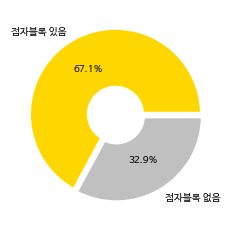

In [28]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie([braille[braille==1].count(), braille[braille==0].count()], labels=["점자블록 있음", "점자블록 없음"], 
        explode=[0.01, 0.01], colors=['gold', 'silver'], autopct='%.1f%%', wedgeprops=wedgeprops)

# 횡단 보도 낮춤 턱 비율

In [10]:
threshold = crosswalk['보도턱낮춤여부'].copy()
samples = samples_with_weight(threshold)
if samples != [] :
    threshold[threshold==' '] = samples
sum(threshold==' ') # 결측치 수

0

In [11]:
#Y=1 N=0
threshold.replace('Y', 1, inplace=True)
threshold.replace('y', 1, inplace=True)

threshold.replace('N', 0, inplace=True)
threshold.replace('n', 0, inplace=True)

([<matplotlib.patches.Wedge at 0x7fa246e37310>,
 [Text(-0.955294725033995, 0.5652539149110104, '낮춤 턱 있음'),
  Text(0.955294777956882, -0.5652538254698606, '낮춤 턱 없음')],
 [Text(-0.5249817858294927, 0.3106350343204652, '83.0%'),
  Text(0.5249818149132414, -0.31063498516812155, '17.0%')])

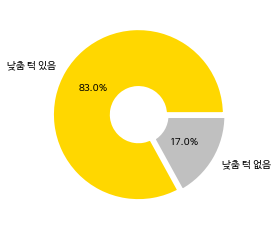

In [30]:
plt.pie([threshold[threshold==1].count(), threshold[threshold==0].count()], labels=["낮춤 턱 있음", "낮춤 턱 없음"], 
        explode=[0.01, 0.01], colors=['gold', 'silver'], autopct='%.1f%%', wedgeprops=wedgeprops)

# 음향 신호기 설치 여부

In [12]:
semaphore = crosswalk['음향신호기설치여부'].copy()
samples = samples_with_weight(semaphore)
if samples != [] :
    semaphore[semaphore==' '] = samples
sum(semaphore==' ')

0

In [13]:
#Y=1 N=0
semaphore.replace('Y', 1, inplace=True)
semaphore.replace('y', 1, inplace=True)

semaphore.replace('N', 0, inplace=True)
semaphore.replace('n', 0, inplace=True)

([<matplotlib.patches.Wedge at 0x7fa245db0610>,
 [Text(0.6440799278829193, 0.9040249147553033, '음향 신호기 있음'),
  Text(-0.6440800125238376, -0.9040248544521845, '음향 신호기 없음')],
 [Text(0.3539538342419647, 0.4968064846853468, '30.3%'),
  Text(-0.35395388075634315, -0.49680645154579506, '69.7%')])

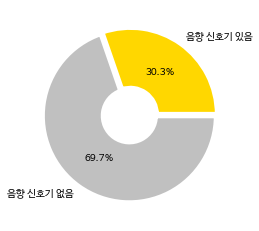

In [31]:
plt.pie([semaphore[semaphore==1].count(), semaphore[semaphore==0].count()], labels=["음향 신호기 있음", "음향 신호기 없음"], 
        explode=[0.01, 0.01], colors=['gold', 'silver'], autopct='%.1f%%', wedgeprops=wedgeprops)

# 집중 조명 시설 설치 여부

In [14]:
light = crosswalk['집중조명시설유무'].copy()
samples = samples_with_weight(light)
if samples != [] :
    light[light==' '] = samples
sum(light==' ')

0

In [15]:
#Y=1 N=0
light.replace('Y', 1, inplace=True)
light.replace('y', 1, inplace=True)

light.replace('N', 0, inplace=True)
light.replace('n', 0, inplace=True)

([<matplotlib.patches.Wedge at 0x7fa245cec710>,
 [Text(0.45204323582302347, 1.0137834645261536, '집중 조명 있음'),
  Text(-0.4520432358230238, -1.0137834645261534, '집중 조명 없음')],
 [Text(0.24842015662346334, 0.5571242462711293, '36.6%'),
  Text(-0.2484201566234635, -0.5571242462711292, '63.4%')])

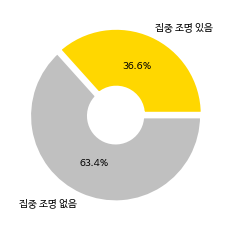

In [33]:
plt.pie([light[light==1].count(), light[light==0].count()], labels=["집중 조명 있음", "집중 조명 없음"], 
        explode=[0.01, 0.01], colors=['gold', 'silver'], autopct='%.1f%%', wedgeprops=wedgeprops)